<a href="https://colab.research.google.com/github/NirjharDebnath/Machine-Learning/blob/main/Classical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning Models

In [82]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd



## List of classical machine learning models

### **Regression Models**
1. **Linear Regression**
2. **Logistic Regression**
3. **Ridge Regression**
4. **Lasso Regression**
5. **Elastic Net Regression**
6. **Random Forest Regression**
7. **Support Vector Machines Regression**

### **Classification Models**
6. **k-Nearest Neighbors (k-NN)**
7. **Support Vector Machines (SVM)**
8. **Naïve Bayes**
9. **Decision Trees**
10. **Random Forest**
11. **Gradient Boosting Machines (GBM)**  
   - Includes models like XGBoost, LightGBM, and CatBoost.

### **Clustering Models**
12. **k-Means Clustering**
13. **Hierarchical Clustering**
14. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
15. **Gaussian Mixture Models (GMM)**

### **Dimensionality Reduction**
16. **Principal Component Analysis (PCA)**
17. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
18. **Linear Discriminant Analysis (LDA)**
19. **Factor Analysis**
20. **Independent Component Analysis (ICA)**

### **Ensemble Methods**
21. **Bagging (e.g., Bagged Trees)**
22. **Boosting (e.g., AdaBoost, Gradient Boosting)**
23. **Stacking**

### **Anomaly Detection**
24. **Isolation Forest**
25. **One-Class SVM**

### **Recommendation Systems**
26. **Collaborative Filtering**
27. **Matrix Factorization**

### **Other Classical Algorithms**
28. **Perceptron**
29. **Gaussian Processes**
30. **Markov Models (e.g., Hidden Markov Model)**

 😊

## Regression


#### Data

In [83]:
DATASETS = {}

In [84]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame
x, y = data["Latitude"], data["Longitude"]

In [85]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


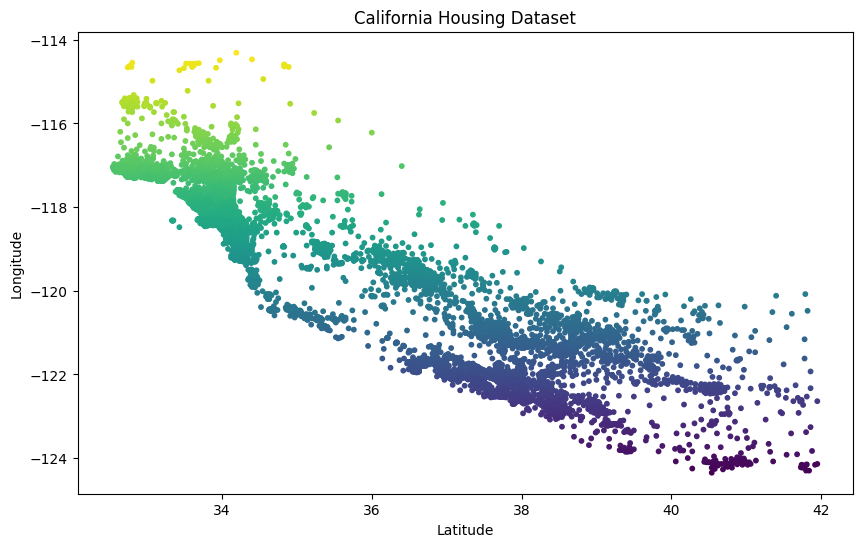

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, s=10, cmap=plt.cm.viridis)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('California Housing Dataset')
plt.show()

In [87]:
data.isnull().sum() # no missing data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [88]:
CLASS_NAMES_Cal = data.columns
Y_Cal = data['MedHouseVal']
X_Cal = data.drop(columns = 'MedHouseVal')
X_Cal = X_Cal.to_numpy()
Y_Cal = Y_Cal.to_numpy()
missing_data = False

DATASETS["CALIFORNIA_HOUSING"] = [X_Cal, Y_Cal, CLASS_NAMES_Cal, missing_data]

In [89]:
X_Cal.shape, Y_Cal.shape

((20640, 8), (20640,))

In [90]:
from sklearn.datasets import fetch_openml

dataset_MPG = fetch_openml(name='autoMpg', version=1, as_frame=True)
data_MPG = dataset_MPG.frame
CLASS_NAMES_MPG = data_MPG.columns
Y_mpg = data_MPG['class']
X_mpg = data_MPG.drop(columns='class')
X_mpg = X_mpg.to_numpy()
Y_mpg = Y_mpg.to_numpy()
DATASETS["MPG"] = [X_mpg, Y_mpg, CLASS_NAMES_MPG]
data_MPG

,cylinders,displacement,horsepower,weight,acceleration,model,origin,class
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,27.0
394,4,97.0,52.0,2130,24.6,82,2,44.0
395,4,135.0,84.0,2295,11.6,82,1,32.0
396,4,120.0,79.0,2625,18.6,82,1,28.0


In [91]:
data_MPG.isnull().sum()
missing_data_MPG = True
DATASETS["MPG"].append(missing_data_MPG)

**Dataset Pipeline**

In [92]:
for DATASET_NAME, DATASET_VALUES in DATASETS.items():
    print(DATASET_NAME)
    print(DATASET_VALUES[0].shape)
    print(DATASET_VALUES[1].shape)
    print(DATASET_VALUES[2])
    print(DATASET_VALUES[3])
    print()

CALIFORNIA_HOUSING
(20640, 8)
(20640,)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
False

MPG
(398, 7)
(398,)
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model', 'origin', 'class'],
      dtype='object')
True



## Choose Dataset

In [93]:
DATASET_NAME = "CALIFORNIA_HOUSING"
X = DATASETS[DATASET_NAME][0]
Y = DATASETS[DATASET_NAME][1]
class_name = DATASETS[DATASET_NAME][2]
X.shape, Y.shape

((20640, 8), (20640,))

In [94]:
# Space for treating missing values

from sklearn.impute import SimpleImputer

def HandleMissingValues(X):
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    return X
if DATASETS[DATASET_NAME][3]==True:
    X = HandleMissingValues(X)

#### Model

Linear Regression

In [95]:
model = []
mse = []
rmse = []
r2 = []

In [96]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
Model : LinearRegression()
Root Mean square Error = 0.7456
Mean Square Error = 0.5559
R2 Score = 0.5758


Polynomial Regression

In [97]:
# improvising polynomial regression

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2) # on testing different degrres of polinomial equation the best possible value is kept
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
Model = linear_model.LinearRegression()

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(f"{Model} with {poly}")
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {poly} with {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.5539974  1.75118566 3.49237927 ... 4.57436358 1.03279127 1.92414302]
Model : PolynomialFeatures() with LinearRegression()
Root Mean square Error = 0.6814
Mean Square Error = 0.4643
R2 Score = 0.6457


Ridge Regression

In [98]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Ridge(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71923978 1.76395141 2.70909238 ... 4.46864495 1.18785499 2.00912494]
Model : Ridge()
Root Mean square Error = 0.7455
Mean Square Error = 0.5558
R2 Score = 0.5759


Lasso Regression

In [99]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Lasso(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.72559335 1.87880366 2.14751489 ... 2.8426924  1.95352989 1.95475031]
Model : Lasso()
Root Mean square Error = 0.9685
Mean Square Error = 0.938
R2 Score = 0.2842


Elastic Net Regression

In [100]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.46966793 1.74416962 2.23145715 ... 3.39813146 1.87369056 1.85958549]
Model : ElasticNet()
Root Mean square Error = 0.8744
Mean Square Error = 0.7646
R2 Score = 0.4166


Descision Tree Regression

Model : DecisionTreeRegressor(max_depth=10, random_state=42)
Root Mean square Error = 0.6446
Mean Square Error = 0.4155
R2 Score = 0.6829


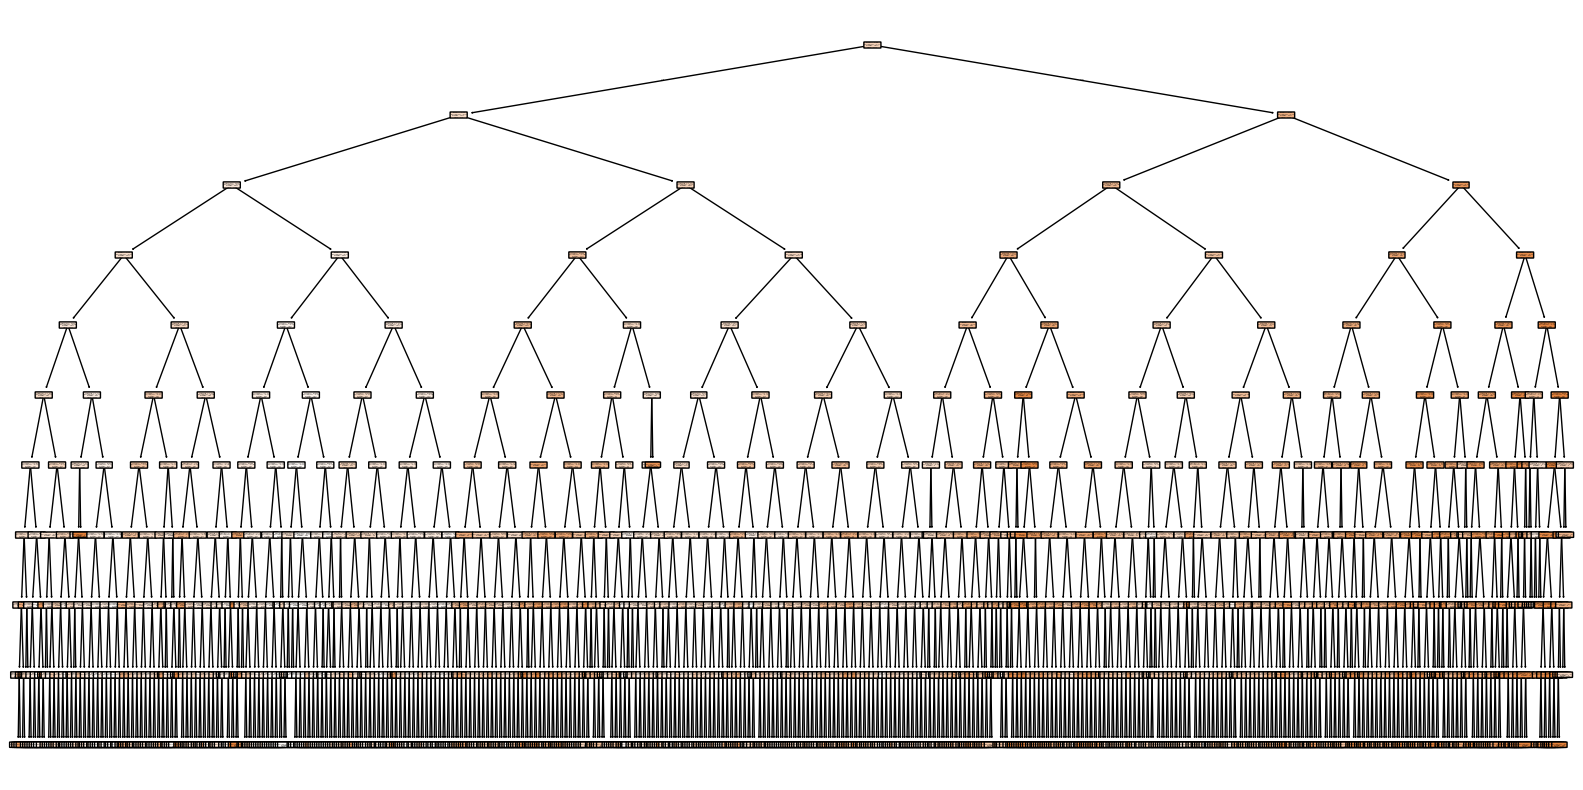

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model = DecisionTreeRegressor(max_depth=10, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.figure(figsize=(20, 10))
plot_tree(Model, feature_names=data.columns, filled=True, rounded=True)
plt.show()

Random Forest Regression

Model : RandomForestRegressor(max_depth=10, random_state=42)
Root Mean square Error = 0.5445
Mean Square Error = 0.2964
R2 Score = 0.7738


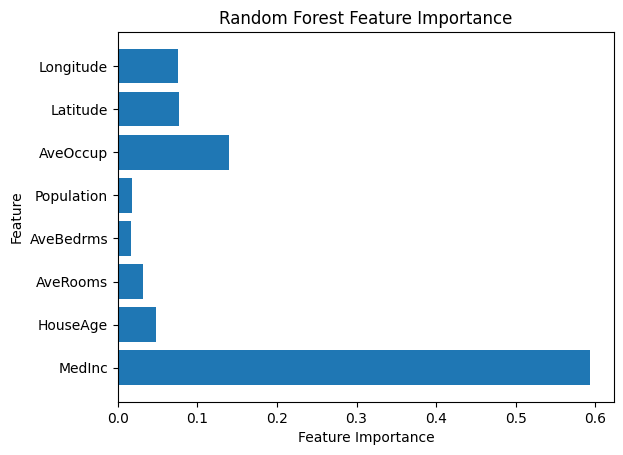

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model = RandomForestRegressor(max_depth=10, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

importances = Model.feature_importances_
feature_names = class_name[:len(class_name)-1]
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

Tensorflow Model

Epoch 1/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6240 - mae: 0.8952 - val_loss: 0.4917 - val_mae: 0.4963
Epoch 2/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4455 - mae: 0.4758 - val_loss: 0.4370 - val_mae: 0.4604
Epoch 3/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3945 - mae: 0.4486 - val_loss: 0.4031 - val_mae: 0.4542
Epoch 4/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5548 - mae: 0.4510 - val_loss: 0.3874 - val_mae: 0.4430
Epoch 5/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3546 - mae: 0.4222 - val_loss: 0.3834 - val_mae: 0.4286
Epoch 6/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3432 - mae: 0.4169 - val_loss: 0.3793 - val_mae: 0.4264
Epoch 7/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3237 - mae: 0.4047 - val_loss: 0.4009 - val_mae: 0.4592
Epoch 8/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3459 - mae: 0.4125 - val_loss: 0.3462 - val_mae: 0.4071
Epoch 9/60
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

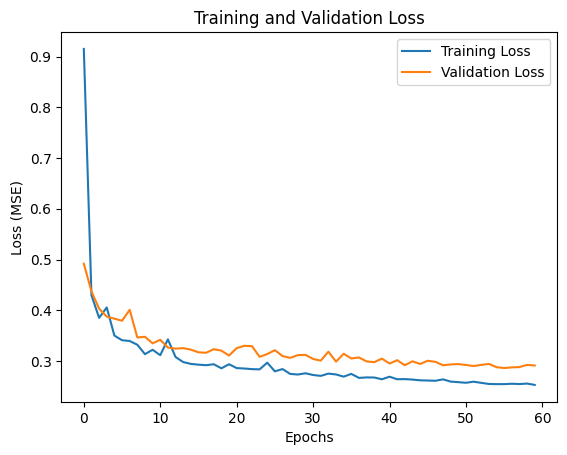

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

Model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = Model.fit(X_train, Y_train, validation_split=0.1, epochs=60, batch_size=32)

Y_pred = Model.predict(X_test).flatten()

model.append("Tensorflow Model")
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [104]:
model = [str(m) for m in model]
ModelResultBoard = pd.DataFrame(np.array([model, mse, rmse, r2]).T, columns=['Model', 'MSE', 'RMSE', 'R2'])
print(DATASET_NAME)
ModelResultBoard.sort_values(by='R2', ascending=False)

CALIFORNIA_HOUSING


,Model,MSE,RMSE,R2
7,Tensorflow Model,0.2789,0.5281,0.7872
6,"RandomForestRegressor(max_depth=10, random_sta...",0.2964,0.5445,0.7738
5,"DecisionTreeRegressor(max_depth=10, random_sta...",0.4155,0.6446,0.6829
1,LinearRegression() with PolynomialFeatures(),0.4643,0.6814,0.6457
2,Ridge(),0.5558,0.7455,0.5759
0,LinearRegression(),0.5559,0.7456,0.5758
4,ElasticNet(),0.7646,0.8744,0.4166
3,Lasso(),0.938,0.9685,0.2842
